In [1]:
!pip3 install vnstock
from vnstock import *

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from datetime import date
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error

import warnings

warnings.filterwarnings('ignore')

In [3]:
SSI = stock_historical_data(symbol = "SSI", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")


In [4]:
SSI = SSI[['Close']]
SSI

,Close
Time,
2017-06-02,10950
2017-06-05,10740
2017-06-06,10870
2017-06-07,10980
2017-06-08,11060
...,...
2023-12-11,32700
2023-12-12,32600
2023-12-13,32000


In [5]:
SSI['Target'] = SSI.Close.shift(-1)
SSI.dropna(inplace = True)
SSI.head()

,Close,Target
Time,,
2017-06-02,10950,10740.0
2017-06-05,10740,10870.0
2017-06-06,10870,10980.0
2017-06-07,10980,11060.0
2017-06-08,11060,11140.0


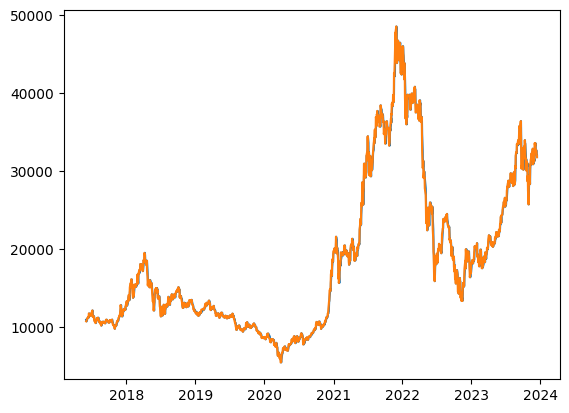

In [6]:
# gán biến
X = SSI[['Close']] # chuỗi thời gian cần dự báo (biến phụ thuộc)
y = SSI[['Target']] # các biến độc lập

plt.plot(X)
plt.plot(y)
plt.show()

In [7]:
# chia train, test
train_size = int(0.8 * len(SSI))
test_size = len(SSI) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [8]:
# tạo mô hình SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(X_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(X_train, y_train)

SVR(C=1000, degree=2, kernel='poly')

In [9]:
# dự đoán giá đóng cửa trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(X_test)
y_pred_poly = y_pred_poly.reshape(-1,1)


In [10]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
test_rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))
msle_rbf = mean_squared_log_error(y_test, y_pred_rbf)

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
mae_poly = mean_absolute_error(y_test, y_pred_poly)
test_rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))
msle_poly = mean_squared_log_error(y_test, y_pred_poly)


In [11]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MAE: ",  mae_rbf)
print("RBF Testing RMSE:", test_rmse_rbf)
print("RBF MSLE: ", msle_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MAE:",  mae_poly)
print("Poly Testing RMSE:", test_rmse_poly)
print("Poly MSLE: ", msle_poly)



RBF MAPE: 2.2259621789048936
RBF MAE:  504.42179995127043
RBF Testing RMSE: Target    695.530921
dtype: float64
RBF MSLE:  0.0009093483191365548
Poly MAPE: 11.091931158794381
Poly MAE: 2464.7903526063506
Poly Testing RMSE: Target    2634.483703
dtype: float64
Poly MSLE:  0.01655075874188613


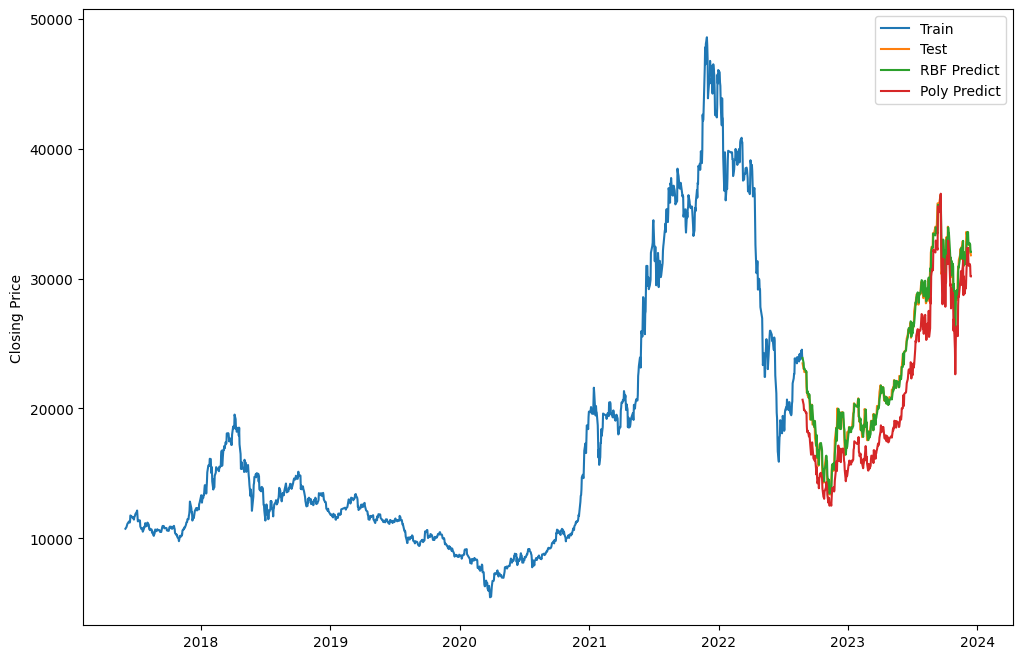

In [12]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [13]:
# lấy giá trị Close của ngày cuối cùng trong dataset
last_row = SSI.tail(1)
last_data = last_row['Close'].values.reshape(-1,1)
last_data

array([[32000]])

In [14]:
# tạo mảng chứa giá trị predict của 60 ngày tiếp theo
x_next_60_days_rbf = []
x_next_60_days_poly = []
# predict giá Close 60 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(60):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_60_days_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(60):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_60_days_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_60_days_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_60_days_poly)

Kết quả dự đoán sử dụng RBF: [array([32057.88714753]), array([32112.81943687]), array([32164.91934789]), array([32214.30862628]), array([32261.10752186]), array([32305.43415887]), array([32347.40402487]), array([32387.12956472]), array([32424.71986673]), array([32460.28042899]), array([32493.91299456]), array([32525.71544552]), array([32555.78174648]), array([32584.20192966]), array([32611.06211407]), array([32636.44455278]), array([32660.42770257]), array([32683.08631147]), array([32704.49151995]), array([32724.71097256]), array([32743.80893704]), array([32761.8464284]), array([32778.88133613]), array([32794.96855276]), array([32810.16010249]), array([32824.50526869]), array([32838.05071955]), array([32850.84063102]), array([32862.91680668]), array([32874.31879397]), array([32885.0839966]), array([32895.24778291]), array([32904.84359004]), array([32913.90302387]), array([32922.45595467]), array([32930.53060856]), array([32938.15365476]), array([32945.35028877]), array([32952.1443115])

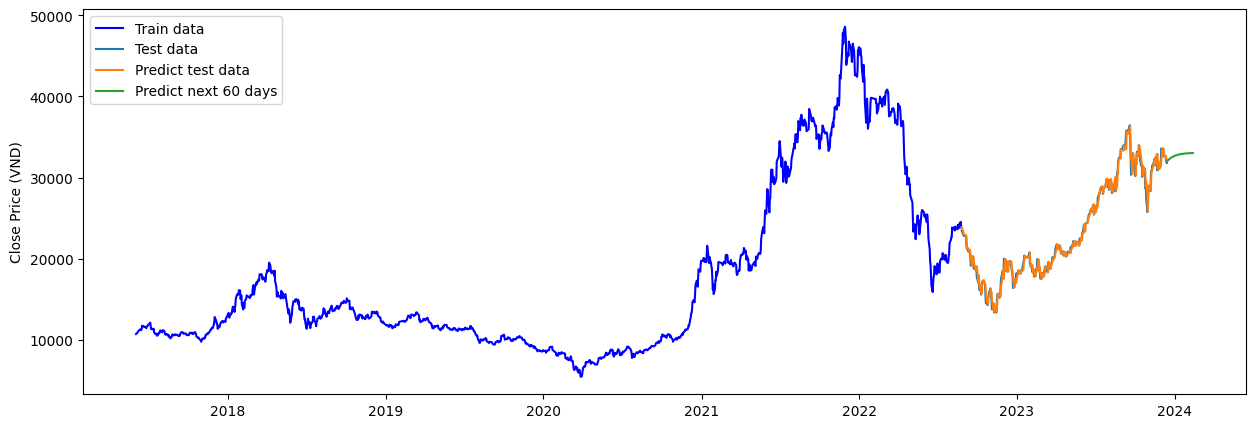

In [16]:
#vẽ mô hình
plt.figure(figsize=(15, 5))
plt.plot(y_train, label='Train data', color = 'b')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred_rbf, label='Predict test data')


last_date = X_test.index[-1]
next_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60, freq='D')
plt.plot(next_dates, x_next_60_days_rbf, label='Predict next 60 days')


plt.ylabel('Close Price (VND)')
plt.legend(loc = 'upper left')
plt.show()

